In [27]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv("sample.csv")
print(df.head())

   customer_number  retailer_number  amount        lat        lon
0       2229599693       5935942946     358  28.520498  76.918551
1       5743794095       5935942946     358  28.767931  77.307866
2       2401497225       5935942946     358  28.687872  76.969272
3       9182394983       5935942946     358  28.488838  76.989693
4       4860622325       5935942946     358  28.829885  77.013805


In [29]:
#elbow
sretailers = df['retailer_number'].drop_duplicates().sample(10, random_state=42)
print(sretailers)


61938    9272755936
39960    7278868302
94905    4101544055
17982    9030324304
96903    4236413822
83916    2092047590
63936    3169631617
41958    8392326275
9990     7878425524
0        5935942946
Name: retailer_number, dtype: int64


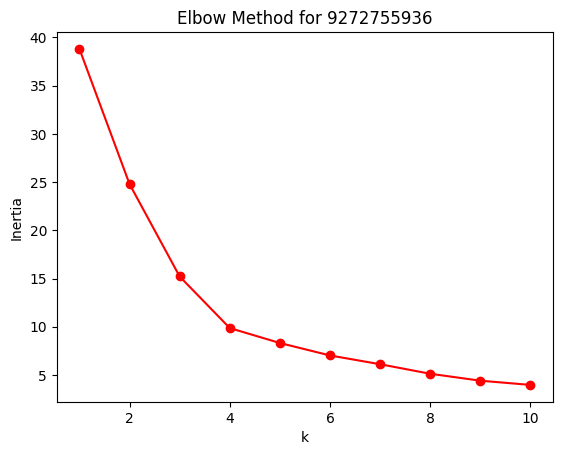

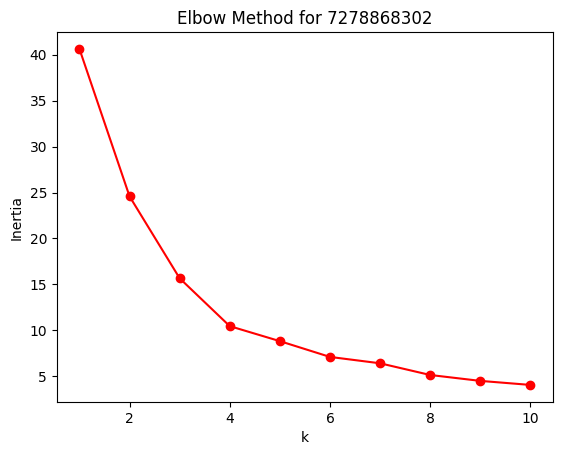

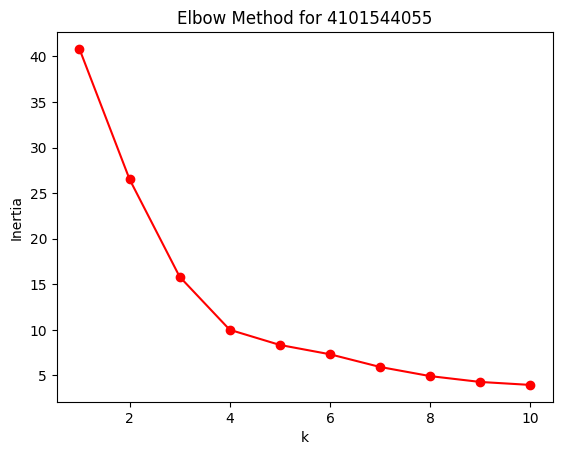

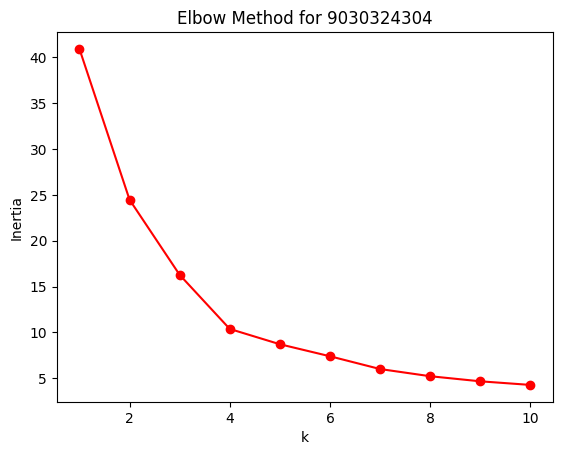

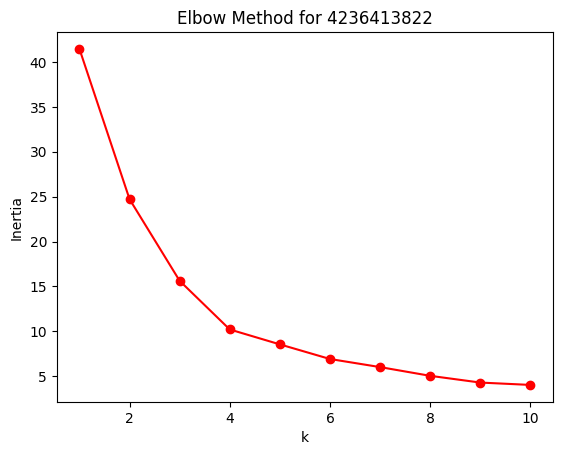

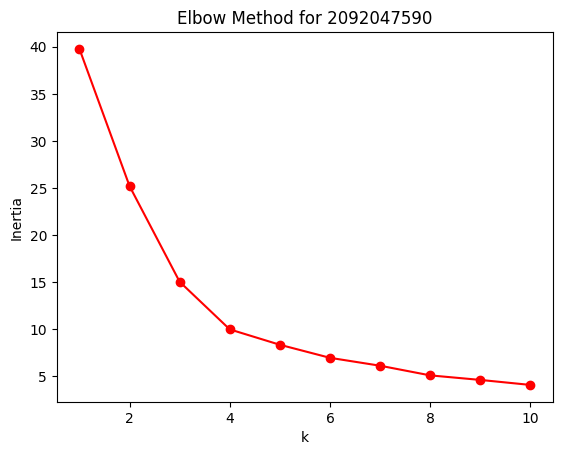

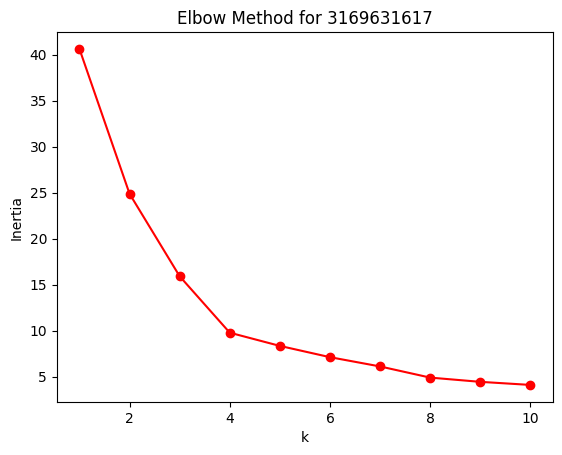

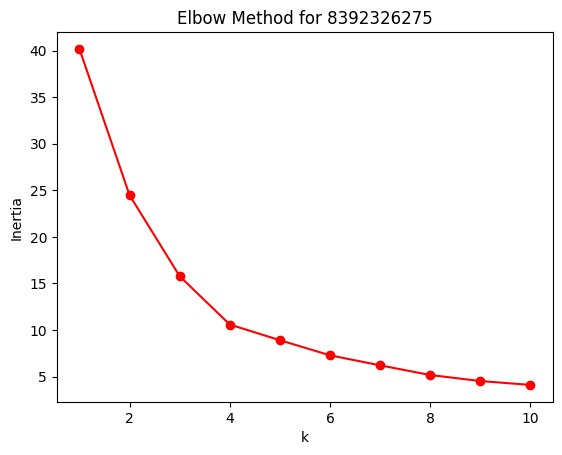

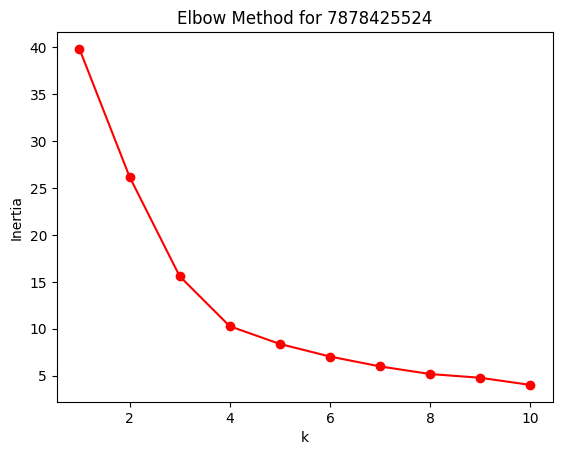

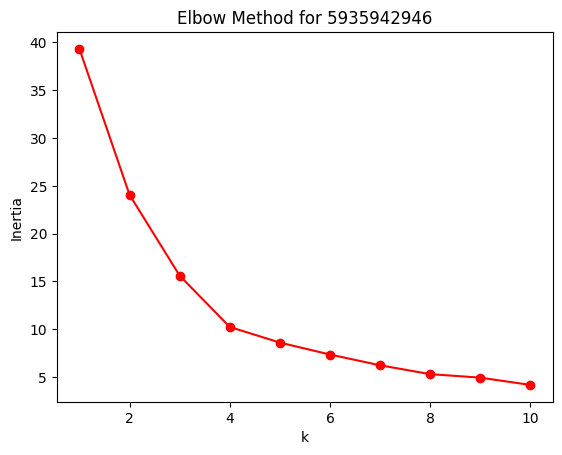

In [30]:
for retailer in sretailers:
    retailerdf = df[df['retailer_number'] == retailer]

    coords = retailerdf[['lat', 'lon']].values

    inertias = []
    krange = range(1, 11)  
    for k in krange:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(coords)
        inertias.append(kmeans.inertia_)

    plt.figure()
    plt.plot(krange, inertias, 'ro-')
    plt.xlabel('k')
    plt.ylabel('Inertia')
    plt.title(f'Elbow Method for {retailer}')
    plt.show()


/var/folders/d7/xxxf53ks7blc_0zpz5dw651r0000gn/T/ipykernel_921/3031099547.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['cluster'] = kmeans.fit_predict(coords)


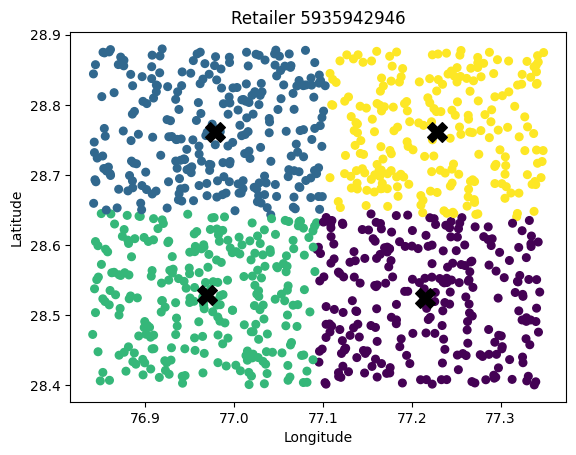

In [ ]:
retailer_number = df['retailer_number'].iloc[0]
subset = df[df['retailer_number'] == retailer_number]
coords = subset[['lat', 'lon']].values

kmeans = KMeans(n_clusters=4, random_state=42)
subset['cluster'] = kmeans.fit_predict(coords)

plt.scatter(subset['lon'], subset['lat'], c=subset['cluster'], cmap='viridis', s=30)

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 1], centroids[:, 0], c='black', marker='X', s=200)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title(f"Retailer {retailer_number}")
plt.show()

In [71]:
newdf = []
for retailer, group in df.groupby("retailer_number"):
    coords = group[['lat', 'lon']].values

    kmeans = KMeans(n_clusters=4, random_state=42)
    group['cluster'] = kmeans.fit_predict(coords)
    
    clusterr = group['cluster'].value_counts().idxmax()
    cluster_center = kmeans.cluster_centers_[clusterr]
    
    newdf.append({
        'retailer_number': retailer,
        'latt': cluster_center[0],
        'lonn': cluster_center[1]
    })

result_df = pd.DataFrame(newdf)
print(result_df)

    retailer_number       latt       lonn
0        1123691769  28.756933  76.972857
1        1133995145  28.771897  76.976623
2        1291116298  28.747659  76.977084
3        1307672232  28.509569  76.973480
4        1452311186  28.753735  77.220235
..              ...        ...        ...
94       9498462679  28.529971  76.981726
95       9595955494  28.762130  76.981090
96       9819310039  28.505828  76.963168
97       9826178041  28.529785  76.965378
98       9877843786  28.758868  77.223745

[99 rows x 3 columns]
